## 介绍

scikit-learn是python主流机器学习工具包，涵盖几乎主流的机器学习算法的实现，并提供统一的调用接口，基于Numpy和scipy等实现

适合小规模使用
不支持分布式计算，不适合处理大规模数据

以最小二乘法为例

目标函数是最小化样本真值与预测值的方差
$$argmin(\sum {(\hat{y}-y)}^2)$$

In [1]:
from sklearn import linear_model
import numpy as np

x = np.array([[0, 1], [3, -2], [2, 3]])
y = np.array([0.5, 0.3, 0.9])

lr = linear_model.LinearRegression()
%time lr.fit(x, y) # 训练，拟合

print("intercept:", lr.intercept_)
print("coef:", lr.coef_)
lr.predict([[1,2],[-3,2]])

Wall time: 111 ms
intercept: 0.3666666666666667
coef: [0.06666667 0.13333333]


array([0.7       , 0.43333333])

alpha 1.000000e-15 :
intercept: -141061.45973829937 
coef: [  -41612.8613455    550967.90780356 -1156905.21157592  1170509.34560538
    79043.77584371  -988786.89009292     1598.50680502   934984.94883325
    -2875.59775147 -1035051.99528297   760145.98246762  -172446.22841522]
alpha 1.000000e-12 :
intercept: 11171.416239722063 
coef: [  4471.74122545 -25883.84967682  17307.61650912  14300.84169956
 -20705.76015551 -15150.32827682  16832.84322952  20786.24276201
 -12503.86669606 -25556.30983868  26334.75159695  -7022.87716686]
alpha 1.000000e-05 :
intercept: 9.495108459514261 
coef: [11.60262677 -7.50222706 -8.24585148 -0.57076348  4.81557323  4.29056605
  0.0287647  -3.66852548 -3.46954386  0.77989975  4.57868611 -2.15873903]
alpha 1.000000e+00 :
intercept: 0.5617598042198563 
coef: [ 0.01022621  0.01183098  0.02443301  0.03355205  0.03548503  0.02839918
  0.01298175 -0.0072697  -0.02593447 -0.03364698 -0.01812285  0.03578972]


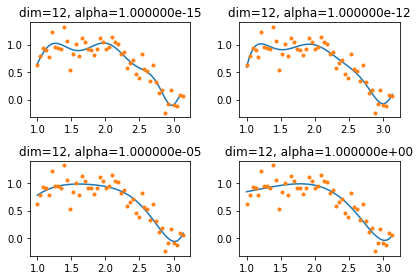

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

def make_data(nDim):
    x0=np.linspace(1, np.pi, 50)
    x=np.vstack([[x0, ], [i**x0 for i in range(2, nDim+1)]])
    y=np.sin(x0)+np.random.normal(0,0.15,len(x0))
    return x.transpose(), y

def linear_regression():
    alphas = [1e-15, 1e-12, 1e-5, 1,]  # 备选超参值
    
    for idx, i in enumerate(alphas):
        plt.subplot(2, len(alphas)/2, idx+1)
        lr = linear_model.Ridge(alpha=i)
        
        sub_x = x[:, 0:12]
        lr.fit(sub_x, y)
        plt.plot(x[:, 0], lr.predict(sub_x))
        plt.plot(x[:, 0], y, ".")
        plt.title("dim=12, alpha=%e"%i)
        
        print("alpha %e :"%i)
        print("intercept: %s "%(lr.intercept_,))
        print("coef: %s"%(lr.coef_,))
    plt.tight_layout()
    plt.show()

x,y =make_data(12)
linear_regression()

### 岭回归 Ridge Regression

针对最小二乘法的缺点，随着特征维度的增加而出现线性模型的过拟合现象，通过改变目标函数，达到控制回归参数值疯狂增长的目的。

$$argmin(\sum {(\hat{y}-y)}^2+\alpha\sum{w^2})$$

其中，$\alpha$是一个超参数，w是线性模型中的所有参数，公式中的$\alpha\sum{w^2}$也被称为L2 惩罚项

alpha 1.000000e-15 :
intercept: -141061.45973829937 
coef: [  -41612.8613455    550967.90780356 -1156905.21157592  1170509.34560538
    79043.77584371  -988786.89009292     1598.50680502   934984.94883325
    -2875.59775147 -1035051.99528297   760145.98246762  -172446.22841522]
alpha 1.000000e-12 :
intercept: 11171.416239722063 
coef: [  4471.74122545 -25883.84967682  17307.61650912  14300.84169956
 -20705.76015551 -15150.32827682  16832.84322952  20786.24276201
 -12503.86669606 -25556.30983868  26334.75159695  -7022.87716686]
alpha 1.000000e-05 :
intercept: 9.495108459514261 
coef: [11.60262677 -7.50222706 -8.24585148 -0.57076348  4.81557323  4.29056605
  0.0287647  -3.66852548 -3.46954386  0.77989975  4.57868611 -2.15873903]
alpha 1.000000e+00 :
intercept: 0.5617598042198563 
coef: [ 0.01022621  0.01183098  0.02443301  0.03355205  0.03548503  0.02839918
  0.01298175 -0.0072697  -0.02593447 -0.03364698 -0.01812285  0.03578972]


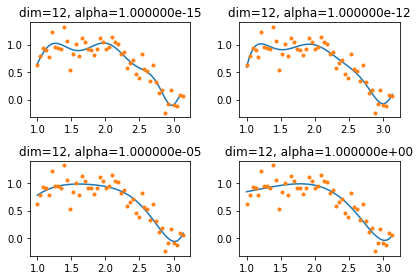

In [3]:
def ridge_regression():
    alphas = [1e-15, 1e-12, 1e-5, 1,]  # 备选超参值
    
    for idx, i in enumerate(alphas):
        plt.subplot(2, len(alphas)/2, idx+1)
        ridge = linear_model.Ridge(alpha=i)
        
        sub_x = x[:, 0:12]
        ridge.fit(sub_x, y)
        plt.plot(x[:, 0], ridge.predict(sub_x))
        plt.plot(x[:, 0], y, ".")
        plt.title("dim=12, alpha=%e"%i)
        
        print("alpha %e :"%i)
        print("intercept: %s "%(ridge.intercept_,))
        print("coef: %s"%(ridge.coef_,))
    plt.tight_layout()
    plt.show()


ridge_regression()

### Lasso 回归

上面岭回归还是存在问题，因为有些特征对结果的影响微乎其微，但是其仍然被赋予了一个非常小的回归系数，增加了模型计算的开销，很多时候也不会给模型带来性能提升。在大型计算密集应用中，会产生较大的资源浪费。

Lasso是将不重要的特征参数设为0的模型，目标函数如下：

$$argmin(\sum {(\hat{y}-y)}^2+\alpha\sum{|w|})$$

其中 $\alpha\sum{|w|}$ 被称为L1惩罚项，惩罚效果比L2严厉很多（可以产生稀疏回归参数，即多数回归参数为0）

alpha 1.000000e-15 :
intercept: 0.7846234737877402 
coef: [ 8.36505844e-01 -3.17518875e-01 -2.71679514e-02 -4.23951596e-03
 -7.38108006e-04 -4.39166602e-05  9.45860812e-05  1.06713516e-04
  9.11559221e-05  7.24832855e-05  5.64681638e-05  4.38884027e-05]
alpha 1.000000e-12 :
intercept: 0.784623473786154 
coef: [ 8.36505844e-01 -3.17518875e-01 -2.71679514e-02 -4.23951596e-03
 -7.38108006e-04 -4.39166602e-05  9.45860812e-05  1.06713516e-04
  9.11559221e-05  7.24832855e-05  5.64681638e-05  4.38884027e-05]
alpha 1.000000e-05 :
intercept: 0.7831937022174016 
coef: [ 8.40431144e-01 -3.18694280e-01 -2.73713149e-02 -4.26015837e-03
 -7.38149752e-04 -4.14351980e-05  9.68013057e-05  1.08441145e-04
  9.24265904e-05  7.34137634e-05  5.71560557e-05  4.44041913e-05]
alpha 1.000000e+00 :
intercept: 0.9958623242643718 
coef: [ 0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -2.21142517e-03 -7.11212360e-04 -2.41750577e-04
 -8.89537945e-05 -3.34137932e-05 -1.17121558e-05 -2

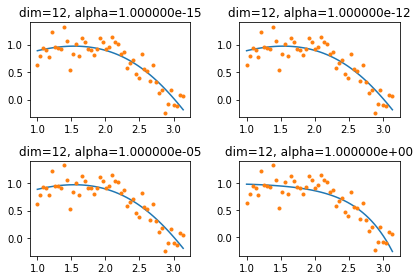

In [4]:
def lasso_regression():
    alphas = [1e-15, 1e-12, 1e-5, 1,]  # 备选超参值
    
    for idx, i in enumerate(alphas):
        plt.subplot(2, len(alphas)/2, idx+1)
        lasso = linear_model.Lasso(alpha=i, tol=1e-1) # 如果不设置tol（收敛精度），默认的lasso会警告未收敛，尝试max_iter=100000000耗时很久依然未收敛，
        
        sub_x = x[:, 0:12]
        lasso.fit(sub_x, y)
        plt.plot(x[:, 0], lasso.predict(sub_x))
        plt.plot(x[:, 0], y, ".")
        plt.title("dim=12, alpha=%e"%i)
        
        print("alpha %e :"%i)
        print("intercept: %s "%(lasso.intercept_,))
        print("coef: %s"%(lasso.coef_,))
    plt.tight_layout()
    plt.show()

lasso_regression()

### 随机梯度下降

sgd是神经网络训练的基础，是一种不保证求得全局最优解的权衡方法


In [5]:
from sklearn.linear_model import SGDRegressor

X=[[0,0],[2,1],[5,4]]
Y=[0,2,2]

lr=SGDRegressor(penalty="l2", max_iter=10000) # penalty是损失函数惩罚项，取值"None", "l1","l2","elasticnet"
lr.fit(X,Y)
lr.predict([[4,3]])
print("intercept: ", lr.intercept_)
print("coef: ", lr.coef_)

intercept:  [0.15914302]
coef:  [0.32041634 0.14509917]


SGDClassifier与SGDRegressor参数类似，返回结果有些不同，前者是一定返回训练数据的目标值之一，后者是假设函数直接计算的结果

In [6]:
from sklearn.linear_model import SGDClassifier
clf=SGDClassifier(penalty="l2", max_iter=100)
clf.fit(X,Y)
clf.predict([[4,3]])

array([2])

### 支持向量机

针对线性不可分问题，通过核函数转换为对偶问题求解。

scikit-learn 没有实现复杂的SVM算法，而是调用两个c++库libsvm, liblinear。

In [7]:
from sklearn import svm
X = [[0,0], [2,2]]
Y=[1,2]
clf = svm.SVC(kernel="rbf")
clf.fit(X,Y)
t=[[2,1],[0,1]]
print(clf.predict(t))
print(clf.decision_function(t))

[2 1]
[ 0.52444566 -0.52444566]


### 贝叶斯

朴素贝叶斯假设所有特征之间都是相互独立的，这一点在实际中很难保证，所以称它为“朴素”。
在scikit-learn有三种朴素贝叶斯的实现，区别在于假设的特征分布不同。

高斯朴素贝叶斯是假设特征分布符合高斯分布（或正态分布），多项式朴素贝叶斯和伯努利朴素贝叶斯也类似。

In [8]:
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB

iris = datasets.load_iris()
gnb = GaussianNB()
gnb.fit(iris.data, iris.target)


print("模型先验概率：",gnb.class_prior_)
print("训练集标签数量：",gnb.class_count_)
print("高斯模型期望值：",gnb.theta_)
print("高斯模型方差：",gnb.sigma_)

模型先验概率： [0.33333333 0.33333333 0.33333333]
训练集标签数量： [50. 50. 50.]
高斯模型期望值： [[5.006 3.428 1.462 0.246]
 [5.936 2.77  4.26  1.326]
 [6.588 2.974 5.552 2.026]]
高斯模型方差： [[0.121764 0.140816 0.029556 0.010884]
 [0.261104 0.0965   0.2164   0.038324]
 [0.396256 0.101924 0.298496 0.073924]]


### 高斯过程

高斯过程是一种假设训练数据来自无限空间、并且各特征都符合高斯分布的有监督建模方式。

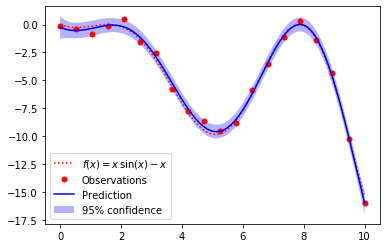

In [9]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import ConstantKernel as C, Product

def f(x):
    return x*np.sin(x)-x

x=np.linspace(0,10,20) #训练样本
y=f(x)+np.random.normal(0, 0.5, x.shape[0]) # 训练样本目标值
test=np.linspace(0,10,200) #测试样本

kernel = Product(C(0.1), RBF(10, (1e-2, 1e2)))

gp=GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=3, alpha=0.3)
gp.fit(x.reshape(-1,1),y)
y_pred, sigma = gp.predict(test.reshape(-1,1),return_std=True)

fig = plt.figure()
plt.plot(test, f(test), 'r:', label=u'$f(x) = x\,\sin(x)-x$')
plt.plot(x,y,'r.',markersize=10, label=u'Observations')
plt.plot(test,y_pred,'b-',label=u'Prediction')
plt.fill(np.concatenate([test,test[::-1]]),
        np.concatenate([y_pred - 2*sigma,
                       (y_pred + 2 * sigma)[::-1]]),
        alpha=.3,fc='b',label='95% confidence')
plt.legend(loc='lower left')
plt.show()

### 决策树

非常成熟的算法，目前最常用的三种算法包括ID3、C4.5、CART

信息熵定义

$$随机事件的熵=H(P_1,P_2,...,P_n)=-\sum_{i=1}^{n}P_i·log_2{(P_i)}$$

因为上述公式需要计算log，这在CPU架构中计算很耗时，所以出现另一个衡量信息价值的指标——基尼指数：
$$随机事件的基尼指数=G(P_1,P_2,...,P_n)=1-\sum_{i=1}^{n}P_i^2$$

In [10]:
from sklearn import tree
x=[[20,30000,400],
  [37,13000,0],
  [50,26000,0],
  [28,10000,3000],
  [31,19000,1500000],
  [46,7000,6000]]
y=[1,0,0,0,1,0]

clf=tree.DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(x,y)
print(clf.predict([[40,6000,0]]))
print(clf.feature_importances_)

[0]
[0.5 0.5 0. ]


In [11]:
# 可以可视化决策树
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=[u"年龄",u"收入",u"存款"],class_names=[u"普通",u"VIP"],filled=True, rotate=True)
graph = graphviz.Source(dot_data)
graph.render("mytree")

'mytree.pdf'

### 集成学习

boosting：Adaboost，有放回采样（在样本数量足够多的情况下，通过bootstrap采用得到的子集只有期望为63.5%的无重复样本）

bagging：随机森林，Out-of-Bag Estimation(划分多个独立数据子集，子模型交叉使用不同的数据子集为训练集和测试集)


In [12]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
iris = load_iris()
clf = RandomForestClassifier(n_estimators = 20, bootstrap = True, oob_score=True)
clf.fit(iris.data, iris.target)
clf.oob_score_

0.9533333333333334

In [13]:
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier
from sklearn.utils import shuffle
from sklearn.naive_bayes import GaussianNB

iris = load_iris()
x,y = shuffle(iris.data, iris.target)
clf = AdaBoostClassifier(GaussianNB())
clf.fit(x[:-20],y[:-20])
clf.score(x[-20:],y[-20:])

0.85